In [89]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [90]:
lambda_virus='https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
first1k_fastq='https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'

In [91]:
import urllib2
def download_file(url,oname):
    urlh = urllib2.urlopen(url)
    out = open (oname,'w')
    out.write(urlh.read())
    out.close()
    
download_file(lambda_virus,"lambda_virus.fa")
download_file(first1k_fastq,"first1000.fastq")
genome=readGenome("lambda_virus.fa")


In [92]:
p='AGGT'
pr=reverseComplement(p)
print len(naive(p,genome)+naive(pr,genome))

306


In [93]:
def naive_with_rc(p, t):
    occurrences1 = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences1.append(i)  # all chars matched; record

    if p == reverseComplement(p):
        return occurrences1 
    
    p = reverseComplement(p)       
    occurrences2 = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences2.append(i)  # all chars matched; record
            
    return sorted(occurrences1+occurrences2)



p='TTAA'
print len(naive_with_rc(p,genome))

195


In [94]:
p='ACTAAGT'
print naive_with_rc(p,genome)[0]
print min(genome.find(p),genome.find(reverseComplement(p)))


26028
26028


In [95]:
p='AGTCGA'
print naive_with_rc(p,genome)[0]
print min(genome.find(p),genome.find(reverseComplement(p)))

450
450


In [96]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatches=0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatches += 1
                if mismatches >2:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [97]:
p='TTCAAGCC'
print len(naive_2mm(p, genome))

p='AGGAGGTT'
print naive_2mm(p, genome)[0]

191
49


In [98]:
sequences,qualities=readFastq("first1000.fastq")

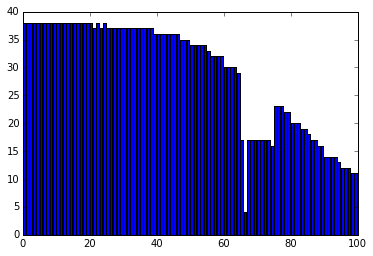

position with low average score:  66 4


In [99]:
# Q7: find the position with problem
# print map(lambda x: len(x), sequences)
# print map(lambda x: len(x), qualities)

# letter score 2 phred score
def phed2score(qual):
    return ord(qual)-33

# firt check quality scores by position
def positional_scores(quals):
    pq=[]
    for i in xrange(100):
        p=[]
        for qual in quals:
            p.append(phed2score(qual[i]))
        pq.append(p)
    return pq

pq=positional_scores(qualities) 
pq_ave=map(lambda x: sum(x)/len(x),pq)

% matplotlib inline
import matplotlib.pyplot as plt
plt.bar(xrange(len(pq_ave)),pq_ave)
plt.show()

# find the position with low scores
for i, q in enumerate(pq_ave):
    if q<5:
        print "position with low average score: ",i,q


In [100]:
print [s[66] for s in sequences]

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'T', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'T', 'N', 'N', 'N', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'G', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'T', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'T', 'N', 'N', 'N', 'N', 'G', 'N', 'N', 'N', 'N', 'N', 'G', 'N', 'N', 'N', 'N', 'N', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',